In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure

# Read in the data from the CSV file
bashliteDataVM1OnlyIP = pd.read_csv('bashliteDataVM1OnlyIP.txt')
bashliteDataVM1OnlyIP["machine"] = "VM1"


#print(bashliteDataVM1OnlyIP)
bashliteDataVM2OnlyIP = pd.read_csv('bashliteDataVM2OnlyIP.txt')
bashliteDataVM2OnlyIP["machine"] = "VM2"
#print(bashliteDataVM2OnlyIP)



bashliteDataWholeOnlyIP = bashliteDataVM1OnlyIP.append(bashliteDataVM2OnlyIP, ignore_index=True)
bashliteDataWholeOnlyIP['duration'] = bashliteDataWholeOnlyIP['duration'].fillna(0)

bashliteDataWholeOnlyIP['endOfInfection'] = bashliteDataWholeOnlyIP['endOfInfection'].fillna(0)
#print(bashliteDataWholeOnlyIP)

     count startOfInfection endOfInfection  duration machine
0       -1         20:04:21              0       0.0     VM1
1        0         20:04:30       20:04:59   28812.0     VM1
2       -1         20:05:34              0       0.0     VM1
3       -1         20:06:11              0       0.0     VM1
4        1         20:06:30       20:06:59   28753.0     VM1
..     ...              ...            ...       ...     ...
356     -1         21:47:30              0       0.0     VM2
357     37         21:47:31       21:47:52   21132.0     VM2
358     -1         21:48:14              0       0.0     VM2
359     -1         21:48:51              0       0.0     VM2
360     -1         21:49:27              0       0.0     VM2

[361 rows x 5 columns]


In [28]:
from datetime import datetime

newTimeStart = []
newTimeEnd = []
newDuration = []

def getSeconds(timeValue):
    #print(timeValue)
    timeArray = timeValue.split(":")
    numSeconds = int(timeArray[0])*3600 + int(timeArray[1]) * 60 + int(timeArray[2])
    return numSeconds
    
startTimeStart = getSeconds(bashliteDataWholeOnlyIP["startOfInfection"][0])
#startTimeEnd = getSeconds(bashliteDataWholeOnlyIP["endOfInfection"][0])


for i,timeValue in enumerate(bashliteDataWholeOnlyIP["startOfInfection"]):
    if timeValue != 0:
        timeDif = getSeconds(timeValue) - startTimeStart
        newTimeStart.append(timeDif)
"""
for i,timeValue in enumerate(bashliteDataWholeOnlyIP["endOfInfection"]):
    if timeValue != 0:
        timeDif = getSeconds(timeValue) - startTimeEnd
        newTimeEnd.append(timeDif)
"""
    
for i,timeValue in enumerate(bashliteDataWholeOnlyIP["duration"]):
    newTime = timeValue/1000
    newDuration.append(newTime)
    
#print(newTimeStart)
#print(newDuration)

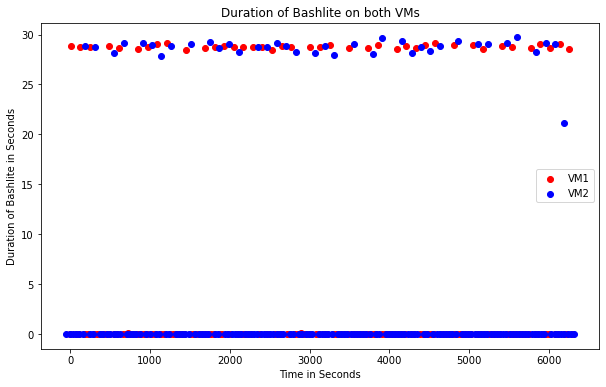

In [29]:
#do muesi jo no iwie di zweit maschine dribringe
import matplotlib.pyplot as plt

bashliteDataWholeOnlyIP["startOfInfection"] = newTimeStart
bashliteDataWholeOnlyIP["duration"] = newDuration

bashliteDataVM1OnlyIP = bashliteDataWholeOnlyIP[bashliteDataWholeOnlyIP['machine'] == 'VM1']
bashliteDataVM2OnlyIP = bashliteDataWholeOnlyIP[bashliteDataWholeOnlyIP['machine'] == 'VM2']
#print(bashliteDataWholeOnlyIP)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10,6))

# Scatter plot with different colors for each point
ax.scatter(bashliteDataVM1OnlyIP['startOfInfection'], bashliteDataVM1OnlyIP['duration'], c="red")
ax.scatter(bashliteDataVM2OnlyIP['startOfInfection'], bashliteDataVM2OnlyIP['duration'], c=["blue"])
#red_meanOnlyIP = CPURAMdata[CPURAMdata['BashliteActive'] == True]['CPUPerc'].meanOnlyIP()
#yellow_meanOnlyIP = CPURAMdata[CPURAMdata['BashliteActive'] == False]['CPUPerc'].meanOnlyIP()

#print(red_meanOnlyIP)
#print(yellow_meanOnlyIP)

# Plot the red meanOnlyIP and the yellow meanOnlyIP as a line
#ax.plot([bashliteDataWholeOnlyIP['time'].min(), bashbashliteDataWholeOnlyIPliteDataWhole['time'].max()], [red_meanOnlyIP, red_meanOnlyIP], color='red')
#ax.plot([bashliteDataWholeOnlyIP['time'].min(), CPURAMdata['time'].max()], [yellow_meanOnlyIP, yellow_meanOnlyIP], color='blue')
plt.legend(["VM1", "VM2"])
plt.title('Duration of Bashlite on both VMs')
plt.xlabel('Time in Seconds')
plt.ylabel('Duration of Bashlite in Seconds')

# Show the plot
plt.show()



<class 'pandas.core.series.Series'>
<class 'list'>
36
36
The meanOnlyIP duration of both Infected is: 57.62219444444445


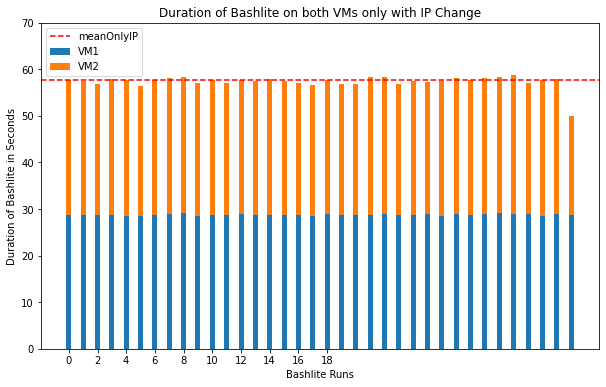

In [30]:
import matplotlib.pyplot as plt
import numpy as np


#print(bashliteDataWholeOnlyIP)


bashliteDataVM1OnlyIP = bashliteDataWholeOnlyIP[bashliteDataWholeOnlyIP['machine'] == 'VM1']
bashliteDataVM2OnlyIP = bashliteDataWholeOnlyIP[bashliteDataWholeOnlyIP['machine'] == 'VM2']



bashliteDataVM1OnlyIP = bashliteDataVM1OnlyIP[bashliteDataVM1OnlyIP["count"] != -1]
bashliteDataVM2OnlyIP = bashliteDataVM2OnlyIP[bashliteDataVM2OnlyIP["count"] != -1]


durationVM1OnlyIP = bashliteDataVM1OnlyIP['duration']
durationVM2OnlyIP = bashliteDataVM2OnlyIP['duration']
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(10,6))




      

durationVM1OnlyIP = durationVM1OnlyIP.reset_index(drop=True)
durationVM2OnlyIP = durationVM2OnlyIP.reset_index(drop=True)
#print(durationVM1OnlyIP)

newdurationVM1OnlyIP = []
newdurationVM2OnlyIP = []

for index,val in enumerate(durationVM2OnlyIP):
    if val != 0:
        if durationVM1OnlyIP.iloc[index] > 10:
            newdurationVM2OnlyIP.append(val)
            #print(durationVM1OnlyIP.get(index))
            newdurationVM1OnlyIP.append(durationVM1OnlyIP.iloc[index])
        

newdurationVM1OnlyIP = pd.Series(newdurationVM1OnlyIP)
#threshold = 10
print(type(newdurationVM1OnlyIP))
print(type(newdurationVM2OnlyIP))
#newdurationVM1OnlyIP = newdurationVM1OnlyIP[newdurationVM1OnlyIP > threshold]
newdurationVM2OnlyIP = pd.Series(newdurationVM2OnlyIP)
    
print(len(newdurationVM1OnlyIP))
print(len(newdurationVM2OnlyIP))
labelsOnlyIP = [i for i in range(0, len(newdurationVM1OnlyIP))]
#print(labelsOnlyIP)

summedUP = []
count = 0
firstRow = True

for value in newdurationVM1OnlyIP:
    summedUP.append(value + newdurationVM2OnlyIP.iloc[0])
    count+=1
    
    
meanOnlyIP = np.mean(summedUP)
print(f"The meanOnlyIP duration of both Infected is: {meanOnlyIP}")

ax.bar(labelsOnlyIP,newdurationVM1OnlyIP, width,label="VM1")
ax.bar(labelsOnlyIP,newdurationVM2OnlyIP, width, bottom=newdurationVM1OnlyIP,
       label='VM2')

ax.axhline(meanOnlyIP, color='r', linestyle='--', label='meanOnlyIP')
plt.ylim(0, 70)
plt.xticks(range(0, 20, 2))
plt.title('Duration of Bashlite on both VMs only with IP Change')
plt.xlabel('Bashlite Runs')
plt.ylabel('Duration of Bashlite in Seconds')
ax.legend()

plt.show()